In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mglearn
from sklearn.model_selection import train_test_split

In [7]:
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data,
    cancer.target,
    random_state=0,
)

svc = SVC()
svc.fit(X_train, y_train)

[
    svc.score(X_train, y_train),
    svc.score(X_test, y_test),
]

[0.903755868544601, 0.9370629370629371]

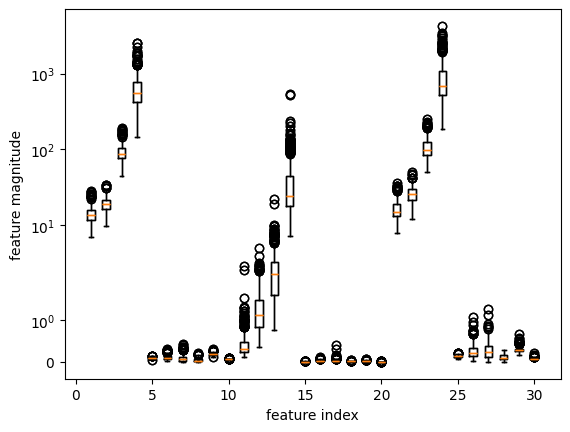

In [10]:
plt.boxplot(X_train, manage_ticks=False)
plt.yscale("symlog")
plt.xlabel("feature index")
plt.ylabel("feature magnitude")

# from this plot we can determine that features are of completely different orders of magnitude
plt.show()

In [27]:
# use MinMaxScaler to scale all features between 0 and 1

# compute the minimum value per features on the set
min_on_training = X_train.min(axis=0)

# compute the range of each feature (max - min) on the training set
range_on_training = (X_train - min_on_training).max(axis=0)

# subtract the min, and divide by range
# afterward, min=0 and max=1 for each feature
X_train_scaled = (X_train - min_on_training) / range_on_training

[
    X_train_scaled.min(axis=0),
    X_train_scaled.max(axis=0),
]

[array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])]

In [29]:
# use the SAME transformation on the test set
# using min and range of the training set
X_test_scaled = (X_test - min_on_training) / range_on_training

[
    X_test_scaled.min(axis=0),
    X_test_scaled.max(axis=0),
]

[array([ 0.03540158,  0.04190871,  0.02895446,  0.01497349,  0.14260888,
         0.04999658,  0.        ,  0.        ,  0.07222222,  0.00589722,
         0.00105015, -0.00057494,  0.00067851, -0.0007963 ,  0.05148726,
         0.01434497,  0.        ,  0.        ,  0.04195752,  0.01113138,
         0.03678406,  0.01252665,  0.03366702,  0.01400904,  0.08531995,
         0.01833687,  0.        ,  0.        ,  0.00749064,  0.02367834]),
 array([0.76809125, 1.22697095, 0.75813696, 0.64750795, 1.20310633,
        1.11643038, 0.99906279, 0.90606362, 0.93232323, 0.94903117,
        0.45573058, 0.72623944, 0.48593507, 0.31641282, 1.36082713,
        1.2784499 , 0.36313131, 0.77476795, 1.32643996, 0.72672498,
        0.82106012, 0.87553305, 0.77887345, 0.67803775, 0.78603975,
        0.87843331, 0.93450479, 1.0024113 , 0.76384782, 0.58743277])]

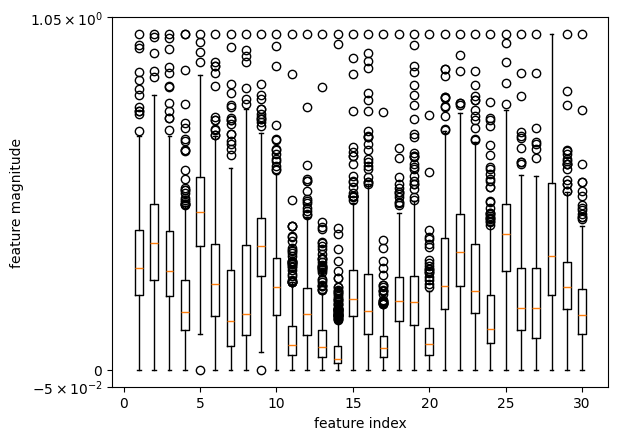

In [34]:
plt.boxplot(X_train_scaled, manage_ticks=False)
plt.yscale("symlog")
plt.xlabel("feature index")
plt.ylabel("feature magnitude")

# from this plot we can determine that features are of completely different orders of magnitude
plt.show()

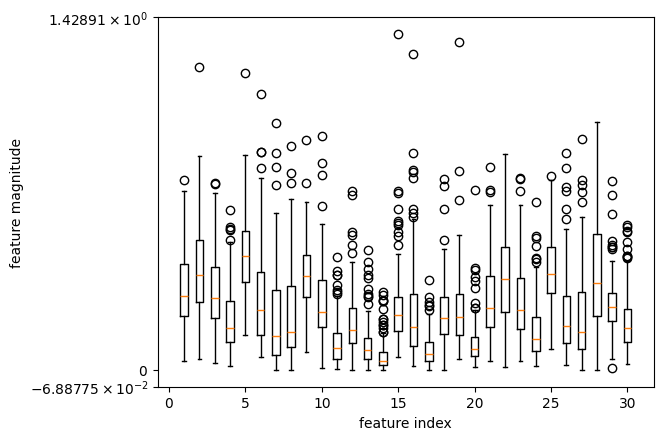

In [35]:
plt.boxplot(X_test_scaled, manage_ticks=False)
plt.yscale("symlog")
plt.xlabel("feature index")
plt.ylabel("feature magnitude")

# from this plot we can determine that features are of completely different orders of magnitude
plt.show()

In [32]:
svc = SVC()
svc.fit(X_train_scaled, y_train)

[
    svc.score(X_train_scaled, y_train),
    svc.score(X_test_scaled, y_test),
]

[0.9835680751173709, 0.972027972027972]

In [65]:
# much better performance. probably underfitting
# now we tweak C and gamma for a more complex model
svc = SVC(C=10, gamma=2.8)
svc.fit(X_train_scaled, y_train)

[
    svc.score(X_train_scaled, y_train),
    svc.score(X_test_scaled, y_test),
]

[0.9953051643192489, 0.986013986013986]